 # Enfriamiento simulado

Es un algoritmo de búsqueda metaheurística para problemas de optimización global; el objetivo general de este tipo de algoritmos es encontrar una buena aproximación al valor óptimo de una función en un espacio de búsqueda grande. A este valor óptimo se lo denomina "óptimo global".

## Abejas vs Pesticidas

El uso excesivo de agroquímicos en los campos está comprometiendo el futuro de las abejas, desencadenando consecuencias que pueden ir más allá de los aspectos ambientales pues estos insectos polinizan los principales cultivos del mundo. Se estima que el 75 por ciento de la alimentación humana depende directa o indirectamente de la acción de los insectos polinizadores.

### Conceptualización

Un pesticida es un compuesto químico que tiene la importancia para el control de plagas en la agricultura. Debido a lo anterior los pesticidas no solamente matan plagas de insectos que afectan los cultivos, sino que también poblaciones de abejas melíferas, las cuales benefician el medio ambiente.

Las abejas son los mayores polinizadores de muchas plantas silvestres y monocultivo. Motivo por el cual, su población es fundamental para la productividad agrícola mundial y es evidente que las alteraciones en sus poblaciones podrían derivar en significativas pérdidas económicas.

La situación actual de las abejas es preocupante, debido a que el censo poblacional ha disminuido drásticamente por el uso extensivo de pesticidas en monocultivos tecnificados que buscan potenciar el rendimiento de la producción.

Los pesticidas son sustancias producidas de forma natural o industrial para destruir organismos potencialmente perjudiciales para las plantas cultivadas y/o animales de producción. Así mismo, se clasifican de acuerdo con el tipo de peste que controlan en: insecticidas (contra insectos), herbicidas (flora arvense), rodenticidas (roedores), bactericidas (bacterias), fungicidas (hongos) y larvicidas (larvas).

Estas sustancias pueden ser tóxicas a su vez para las especies que comparten el sitio de fumigación y, dependiendo de la dosificación, pueden tener una acción letal o subletal; a la par, permanecer residualmente en el medio ambiente.

### Planteamiento

Con base a lo anterior un pesticida contempla tres propiedades inherentes, las cuales son composición, forma de aplicación y residualidad:

**Composición:** Está compuesto por varios químicos incluyendo un ingrediente activo que es el químico que mata, controla o repele plagas.

**Exposición:** La exposición de las abejas se puede presentar por contacto, por alimentación o por las dos situaciones combinadas.

**Aplicación:** Las formas de aplicación de los pesticidas con sus respectivas características, son espolvoreo, pulverización, fumigación, aplicación de cebos, tratamientos vía riego y aplicación en el suelo.

**Residuality:** La residualidad del pesticida es un resultado de diversos factores, como la forma y sitio de aplicación, dosis, grado de infestación de la plaga y nivel de control o riesgo, exposición a microorganismos y materia orgánica.

Teniendo en cuenta las características mencionadas de los pesticidas, se desea saber cómo deben combinarse estas cuatro características para saber el grado de toxicidad potencial del pesticida y así minimizar la tasa de mortalidad de las poblaciones de abejas melíferas. Para llegar a este resultado hay que tener presente que:

* El porcentaje de ingrediente activo en el compuesto puede ser variable.
* Algunos pesticidas son: Corrosivos, irritantes, inflamables o explosivos.
* La forma de aplicación puede ser cualquiera de las mencionadas anteriormente.
* La residualidad  depende de las condiciones de la aplicación.
* La exposición de las abejas a los pesticidas puede ser por contacto, alimentación o ambas.
* El grado de toxicidad potencial del ingrediente activo puede ser: De baja peligrosidad, nocivo, toxico, muy tóxico.

La idea es que el modelo se pueda aplicar para cualquier combinación de cultivo-plaga


# Librerías

In [15]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

# Representación de los datos

Los **cromosomas** del individuo para encontrar una posible solución al problema de las Abejas vs Pesticidas, estan representados pos las siguientes clases:

* Cromosoma **Ingrediente** define el ingrediente activo utilizado para un determinado cultivo (Lista de posibles ingredientes activos utilizados para un determinado cultivo) presente en el compuesto y respectiva clasificación (Corrosivo, irritante, inflamable o explosivo).
* Cromosoma **Exposicion** define si la exposición que presentan las abejas mielíferas al ingreduente activo es por contacto, alimentación o ambas.
* Cromosoma **Aplicacion** define la forma en la que es aplicado el pesticida en el cultivo (espolvoreo, pulverización, fumigación, aplicación de cebos, tratamientos vía riego y aplicación en el suelo)
* Cromosoma **Residualidad** define el tiempo en días que el ingrediente activo esta presente en el ecosistema

Cada uno de los **individuos** del algoritmo genético esta representado por la clase **Combinacion**, la cual es la unión de las clases anteriormente mencionadas más el porcentaje de concentración del ingrediente activo:

* Clase **Compuesto** define el nombre del ingrediente activo presente en el compuesto

In [16]:
class Combinacion:
    def __init__(
            self,
            ingrediente,
            clasificacion,
            concentracion,
            forma,
            tipo,
            tiempo
    ):
        self.ingrediente = ingrediente
        self.clasificacion = clasificacion
        self.concentracion = concentracion
        self.forma = forma
        self.tipo = tipo
        self.tiempo = tiempo

# ¿Cual es el problema a resolver?

El objetivo es calcular la toxicidad potencial de cada individuo por la combinación de la concentración de un ingrediente activo específico, la forma de exposición, el tipo de aplicación y la residualidad  para cualquier cultivo en el cual se aplique algún tipo de pesticida, vamos a simular un caso particular para un cultivo dado, aplicando varios posibles pesticidas especializados en el cultivo seleccionado.

## Problema

Al hacer una revisión exhaustiva de todos los métodos de calculo de la toxicidad potencial se encontró una gran cantidad de métodos entre los cuales se encuentran:

* El  desarrollado  por  Heijungs  et  al.,  (1992)  y  el  Ecoindicador 95 (Goedkoop y col., 1995). Éstos primeros métodos son los más simplificados y no consideran  destino  final  en  el  ambiente.  Por  tanto  sólo  son  comparables  substancias  de  tiempo  medio de residencia. Esto conlleva  que  sea  un  método  poco  adecuado  para  su  aplicación  en  plaguicidas  en  que  las  vías  de  exposición  son  diversas:  ingesta  de  alimentos,  agua,  inhalación,  ...  y  los  tiempos  de  residencia  varían considerablemente para los diferentes plaguicidas.

* Hauschild  (1994)  propone  un  método  EDIP  (Environmental  Development  of  Industrial Products)  en  que  se  analiza  parcialmente  el  destino  final  de  la  substancia.  Este  autor no  ha  desarrollado  factores  de  caracterización  para  plaguicidas.  Esto  significa  un avance  para  la  aplicación  de  este  método  en  agricultura;  sin  embargo  no se considera la ingesta de alimentos.

* Jolliet   (1996)   desarrolla   un   método   semi-empírico,   Critical   Surface   Time   (CST), recomendado  en  Audsley  (1997)  para  su  utilización  en  los  ACVs  de  los  sistemas agrícolas.  Trabajos posteriores, optimizan su uso para la aplicación en el cálculo  del impacto  de  toxicidad  de  los  plaguicidas.  Este  método  incluye  un  análisis  del  factor destino  de  los  diferentes  contaminantes,  en  relación  con  el  tiempo  de  residencia  y  el volumen  de  dilución  en  cada  medio,  aire,  agua  y  suelo  y  la  fracción  absorbida.  Es el primer  método  que  incluye  una  aproximación  al  cálculo  de  la  toxicidad  potencial en alimentos  basado  en  el  nivel  de  residuo máximo autorizado.

Los anteriores son solamente algunos métodos existentes para calcular la toxicidad potencial de cada pesticida, además, existen protocolos adicionales para dicho calculo en insectos polinizadores como las abejas, sin embrago las formulas y estimaciones son variables dependiendo del tipo de contacto de los pesticidas con las abejas, ya sea por contacto físico o ingestión, ademas también varían las formulas dependiendo de la forma de aplicación, las especificaciones del ecosistema, etc. También  hay que tener en cuenta que la aplicación de las formulas varían de un pais a otro en cuento al calculo respectivo.

Teniendo en cuenta lo anterior y basándose en estudios de toxicidad y clasificación de pesticidas para este proyecto se planteo la asignación de pesos según las diferentes combinaciones de ingrediente activo, clasificación de ingrediente activo, tipo de exposición, forma de aplicación y tiempo de residualidad.

Es claro que dicha asignación de pesos a las diferentes combinaciones implica un comportamiento ideal de los individuos o poblaciones con las que se esta trabajando, sin embargo la gran cantidad de métodos que existen para el calculo de toxicidad implica mucho mas tiempo del disponible motivo por el cual los modelos de algoritmos genéticos y enfriamiento simulado están trabando con pesos según la combinación respectiva a cada individuo  y la simulación desarrollada trabaja con esos aparatosos para calcular la aptitud en caso del algoritmo genético y el costo en caso del enfriamiento simulado. Las distribución de pesos esta data por la siguiente tabla de datos.

Para el caso del porcentaje de ingrediente activo, a mayor concentración de ingrediente activo el riesgo aumenta. Se diseño una formula simple que evidencia este comportamiento, sin embargo a medida que el estudio avance la formula puede ser reemplazada por una formula mucho más apropiada

>$RC = 1/(1,1 - concentración)$

La residualidad contempla inicialmente un comportamiento lineal, en el cual se evidencia que entre más tiempo el pesticida se encuentre en el ecosistema más probabilidad tiene de contaminar insectos melíferos. De igual forma a medida que el estudio avance  puede ser asignada una formula mucho más apropiada para dicho comportamiento ya que la residualidad esta estrictamente ligada a las características de medio ambiente.

In [17]:
#Arreglos que representan los pesos de cada una de las características de los pesticidas

clasificacion = {
  1: 1, # Corrosivo
  2: 2, # Irritante
  3: 3, # Inflamable
  4: 4 # Explosivo
}

exposicion = {
  1: 1, # Contacto
  2: 2, # Alimentación
  3: 3 # Ambas
}

aplicacion = {
  1: 1, # Espolvoreo
  2: 2, # Pulverización
  3: 3, # Fumigación
  4: 4, # Aplicación de cebos
  5: 5, # Tratamientos vía riego
  6: 6 # Aplicación en el suelo
}

residualidad = {}
for i in range(1,90):
    residualidad[i] = i

## Peso
Para este caso, el costo de una solución es el calculo de la toxicidad del mismo que esta dado por la combinación de la concentración de un ingrediente activo específico, la forma de exposición, el tipo de aplicación y la residualidad como se menciono anteriormente y dicha aptitud esta dada por la formula:

>$Aptitud=RC+[\sum_{i=1}^{N} RCI(Valor_{i})]+[\sum_{i=1}^{N} RFE(Valor_{i})]+[\sum_{i=1}^{N} RFA(Valor_{i})]+[\sum_{i=1}^{N} RTR(Valor_{i})]$

>$RC = 1/(1,1 - concentración)$

### Descripción

>**RC** = Riesgo por concentración

>**RCI** = Riesgo por clasificación del ingrediente activo

>**RFE** = Riesgo por forma de exposición

>**RFA** = Riesgo por forma de aplicación

>**RTR** = Riesgo por tiempo de residualidad

Definimos la función para calcular el costo para todas las posibles soluciones, está formula fue construida con base a lo expuesto anteriormente. La función hace el sumatorio de puntos de riesgo acumulados por cada uno de los individuos y buscando los individuos que tengan menor temperatura (toxicidad potencial).

In [18]:
class Costo:
    def __init__(self, combinacion):
        self.combinacion = combinacion
        self.riesgo = 0

    def calculoCosto(self):
        suma = 1/ (1.1 - self.combinacion.concentracion)
        if self.combinacion.clasificacion in clasificacion:
            suma = suma + clasificacion[self.combinacion.clasificacion]
        if self.combinacion.forma in exposicion:
            suma = suma + exposicion[self.combinacion.forma]
        if self.combinacion.tipo in aplicacion:
            suma = suma + aplicacion[self.combinacion.tipo]
        if self.combinacion.tiempo in residualidad:
            suma = suma + residualidad[self.combinacion.tiempo]
        self.riesgo = suma
        return self.riesgo


def costando(poblacion, T):
    costo = 0
    for i in range(len(poblacion)):
        if costo == 0:
            costo = Costo(poblacion[i]).calculoCosto()
        else:
            costo1 = Costo(poblacion[i]).calculoCosto()
            if costo1<costo or np.random.random()<T:
                costo = costo1
    return costo

## Funciones

In [19]:
#Creamos la solcución inicial de forma aleatoría.
def solucionInicial(n_vecinos):
    soluciones = []
    for i in range(0, n_vecinos):
        soluciones.append(Combinacion(
            concentracion=random.random(),
            ingrediente="Ingrediente activo " + str(i + 1),
            clasificacion=random.randint(1, 4),
            forma=random.randint(1, 3),
            tipo=random.randint(1, 6),
            tiempo=random.randint(1, 90)
            )
        )
    return soluciones

def inicializarPoblaciones(n_poblaciones, n_vecinos):
  poblaciones = []
  for i in range(n_poblaciones):
    poblaciones.append(solucionInicial(n_vecinos))
  return poblaciones

#Creamos una función que para obtener un vecino de cualquier solución
def vecino(solucion):
    pos1 = np.random.randint(len(solucion))
    pos2 = pos1+1 if pos1<len(solucion)-1 else 0
    arreglo = np.copy(solucion)
    arreglo[pos1]=solucion[pos2]
    arreglo[pos2]=solucion[pos1]
    return arreglo

## Algoritmo de enfriamiento simulado
Hemos un bucle bajando la temperatura.

In [22]:
def algoritmo(n_poblaciones, n_vecinos, pasos_enfrimiento):
    varios = []

    mejorCosto = []
    costoMedio = []
    desviacionCosto  = []

    poblaciones = inicializarPoblaciones(n_poblaciones, n_vecinos)

    costoMinimo = np.inf
    minimoSolucion  = None

    for T in range(0, pasos_enfrimiento):
        costos = []
        for i in range(len(poblaciones)):
            solucion = poblaciones[i]
            costoSolucion = costando(solucion, T)

            vecinito = vecino(solucion)
            costoVecino = costando(vecinito, T)

            if costoVecino<costoSolucion or np.random.random()<T:
                solucion = vecinito
                costoSolucion = costoVecino

            poblaciones[i] = solucion
            costos.append(costoSolucion)

            if costoSolucion < costoMinimo:
                minimoSolucion  = np.copy(poblaciones[i])
                costoMinimo = costando(poblaciones[i], T)

        mejorCosto.append(np.min(costos))
        costoMedio.append(np.mean(costos))
        desviacionCosto.append(np.std(costos))
        if T%50==0:
          print('Paso '+str(T),"Mejor costo: ",mejorCosto[T])

    mejorCosto = np.array(mejorCosto)
    costoMedio = np.array(costoMedio)
    desviacionCosto  = np.array(desviacionCosto)

    varios.append(minimoSolucion)
    varios.append(mejorCosto)
    varios.append(costoMedio)
    varios.append(desviacionCosto)

    fig = plt.figure(figsize=(15,10))
    plt.plot(costoMedio, label="Media")
    plt.plot(mejorCosto, label="Mejores")
    plt.fill_between(range(len(costoMedio)), costoMedio-desviacionCosto, costoMedio+desviacionCosto, color="yellow", alpha=0.2)
    plt.legend()
    plt.ylabel('Costo')
    plt.xlabel('Iteraciones')
    plt.title("Best Costs: %.3f"%costoMinimo)

## Pruebas
Realizamos las pruebas del algoritmo de enfrimiento simulado previamente programado.

Paso 0 Mejor costo:  4.281215488639729
Paso 50 Mejor costo:  9.162619229832712
Paso 100 Mejor costo:  9.162619229832712
Paso 150 Mejor costo:  10.460574521882437
Paso 200 Mejor costo:  10.510549458434841
Paso 250 Mejor costo:  9.082218787536455
Paso 300 Mejor costo:  10.460574521882437
Paso 350 Mejor costo:  9.309564747677804
Paso 400 Mejor costo:  12.596616520215115
Paso 450 Mejor costo:  9.082218787536455
Paso 500 Mejor costo:  12.596616520215115
Paso 550 Mejor costo:  9.309564747677804
Paso 600 Mejor costo:  10.460574521882437
Paso 650 Mejor costo:  9.309564747677804
Paso 700 Mejor costo:  9.309564747677804
Paso 750 Mejor costo:  9.680302749652324
Paso 800 Mejor costo:  11.03155450845201
Paso 850 Mejor costo:  10.679882848769623
Paso 900 Mejor costo:  10.679882848769623
Paso 950 Mejor costo:  9.549040463222667


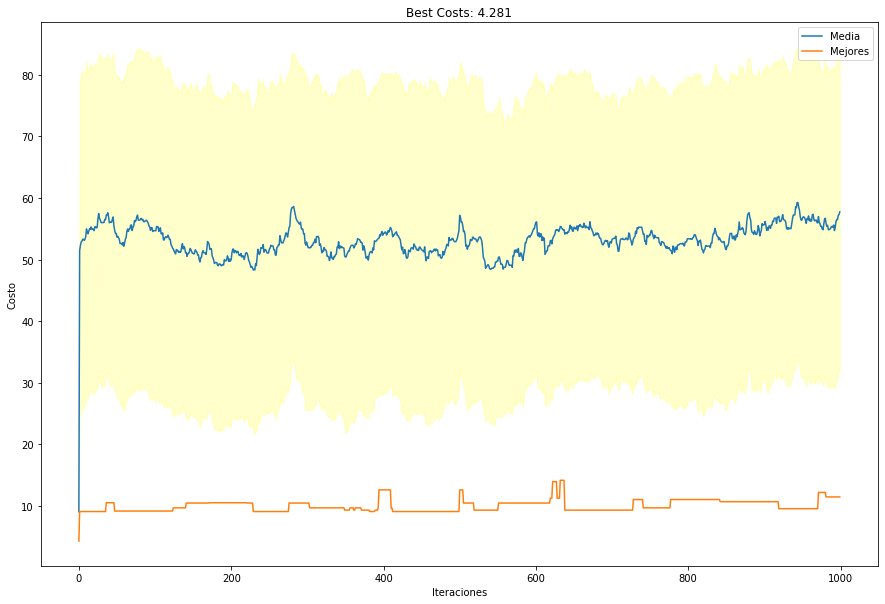

In [23]:
algoritmo(n_poblaciones = 100, n_vecinos=100, pasos_enfrimiento=1000)

## Investigaciones y Artículos

[1] [Guía de Evaluación de Riesgos de Plaguicidas para las Abejas](https://espanol.epa.gov/sites/production-es/files/2017-12/documents/120517_guia_de_evaluacion_de_riesgos_de_plaguicidas_para_las_abejas_update.pdf)

[2] [Abejas y Agrotóxicos](https://www.apiservices.biz/documents/articulos-es/abejas_y_agrotoxicos.pdf)

[3] [Los plaguicidas, adsorción y evolución en el suelo](https://digital.csic.es/bitstream/10261/12919/1/plaguicidas.pdf%3B)

[4] [Calculo de la toxicidad potencial de los plaguicidas](https://www.tdx.cat/bitstream/handle/10803/6827/06CAPITOL5.pdf?sequence=6&isAllowed=y)

[5] [Desarrollo de métodos para la reducción de la contaminación por plaguicidas en aguas subterráneas mediante la adición de residuos orgánicos a los suelos](https://idus.us.es/bitstream/handle/11441/41630/Tesis%20completa%20(enviar).pdf)

[6] [Daño colateral en abejas por la exposición a pesticidas de uso agrícola](http://www.scielo.org.co/pdf/entra/v14n1/1900-3803-entra-14-01-232.pdf)

[7] [Insecticidas más tóxico para las abejas ¿Por qué?](https://agriculturers.com/insecticidas-mas-toxico-para-las-abejas-por-que/)

[8] [Residualidad de un herbicida](https://www.rainbowconosur.com/uy/detalle-de-residualidad-de-un-herbicida-194)


